## Illustration of Xgboost method

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import multiprocessing
from sklearn.model_selection import GridSearchCV
import os
import zipfile

In [2]:
zip_path = 'dataLSTM_SR.txt.zip'
# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall()

In [3]:
ls

EWRI_2025_workshop.pdf      frame_024.png
README.md                   frame_025.png
Xgboost_illustration.ipynb  frame_026.png
Xgboost_tutorial.ipynb      frame_027.png
dataLSTM_SR.txt             frame_028.png
dataLSTM_SR.txt.zip         frame_029.png
frame_001.png               frame_030.png
frame_002.png               frame_031.png
frame_003.png               frame_032.png
frame_004.png               frame_033.png
frame_005.png               frame_034.png
frame_006.png               frame_035.png
frame_007.png               frame_036.png
frame_008.png               frame_037.png
frame_009.png               frame_038.png
frame_010.png               frame_039.png
frame_011.png               frame_040.png
frame_012.png               frame_041.png
frame_013.png               frame_042.png
frame_014.png               frame_043.png
frame_015.png               frame_044.png
frame_016.png               frame_045.png
frame_017.png               frame_046.png
frame_018.png               frame_

In [4]:
def XgboostParamTuning(X,y):
    if __name__ == "__main__":
        print("Parallel Parameter optimization")
        xgb_model = xgb.XGBRegressor(n_jobs=10, tree_method="hist",
                                    objective = 'reg:quantileerror', quantile_alpha=0.5, verbosity=0)
        clf = GridSearchCV(
            xgb_model,
            {"max_depth": [2, 4, 6, 8, 10, 15, 20], "n_estimators": [50, 100, 200], 'booster': ['gbtree', 'gblinear'],
             'eta': [0.10, 0.30, 0.50, 0.80, 1.00], 'subsample': [0.5, 0.75, 1.00]},
            verbose = 1,
            n_jobs = 2,
            cv = 3
        )
        clf.fit(X, y)
    
    return clf

In [5]:
# A plot to show how xgboost works
xtrain = np.arange(0, 100, 0.5).reshape(-1,1)
ytrain= (xtrain-50)**2 + 10

# Optimal hyperparameters
clf = XgboostParamTuning(xtrain, ytrain)
param = clf.best_params_

# Train the model
xgb_model = xgb.XGBRegressor(n_jobs=multiprocessing.cpu_count(), tree_method="hist", 
                             objective = 'reg:quantileerror', quantile_alpha=0.5, booster = param['booster'], max_depth = param['max_depth'], 
                             n_estimators = param['n_estimators'], eta = param['eta'], subsample = param['subsample'])
xgb_model.fit(xtrain, ytrain)

Parallel Parameter optimization
Fitting 3 folds for each of 630 candidates, totalling 1890 fits


XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.8, eval_metric=None,
             feature_types=None, feature_weights=None, gamma=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=8, ...)

In [11]:
def computeNSE(obs, pred):
  sse = np.sum((obs - pred)**2)
  sst = np.sum((obs - np.mean(obs))**2)
  nse = 1 - sse/sst
  return nse

In [12]:
# Assess the model performance
nse = computeNSE(ytest, ytest_est)
r2 = np.corrcoef(ytest, ytest_est)[0,1]**2
rmse = np.mean((ytest - ytest_est)**2)**0.5
 # Plot
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 14
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
mx = np.max((ytest, ytest_est))
plt.scatter(ytest, ytest_est)
plt.plot([0, mx], [0, mx], color='black')
plt.grid(alpha=0.7)
plt.xlabel('Observed SSC (mg/L)', fontweight = 'bold')
plt.ylabel('Estimated SSC (mg/L)', fontweight = 'bold')
plt.subplot(1,2,2)
mx = np.max((ytest, ytest_est))
plt.scatter(ytest, ytest_est)
plt.plot([0, mx], [0, mx], color='black')
plt.grid(alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Observed SSC (mg/L)', fontweight = 'bold')
plt.suptitle('NSE = {}, R$^2$ = {}, RMSE = {} mg/L'.format(round(nse, 2), round(r2, 2), round(rmse, 2)))

NameError: name 'ytest' is not defined

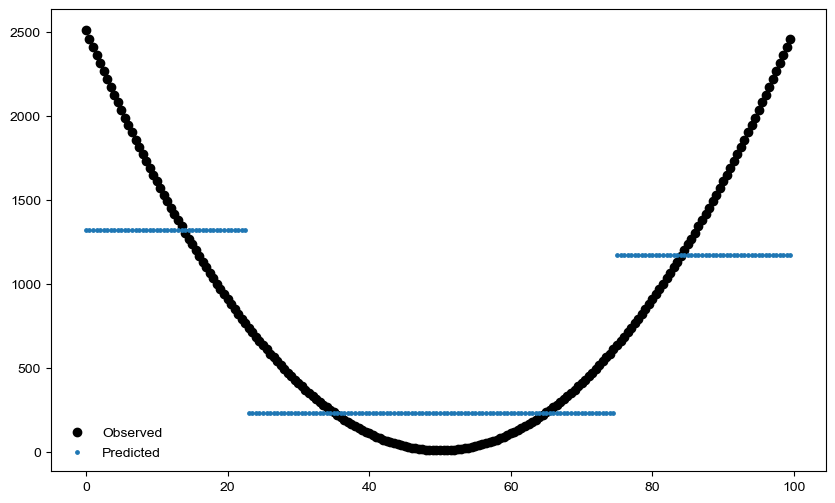

<Figure size 640x480 with 0 Axes>

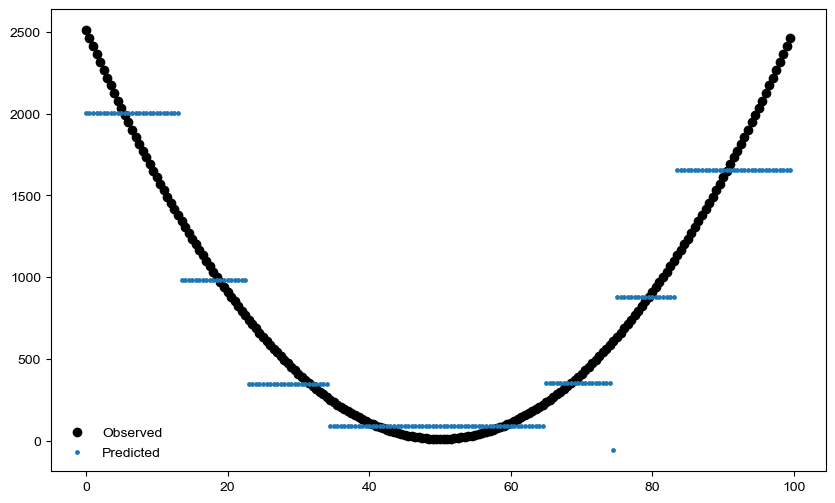

<Figure size 640x480 with 0 Axes>

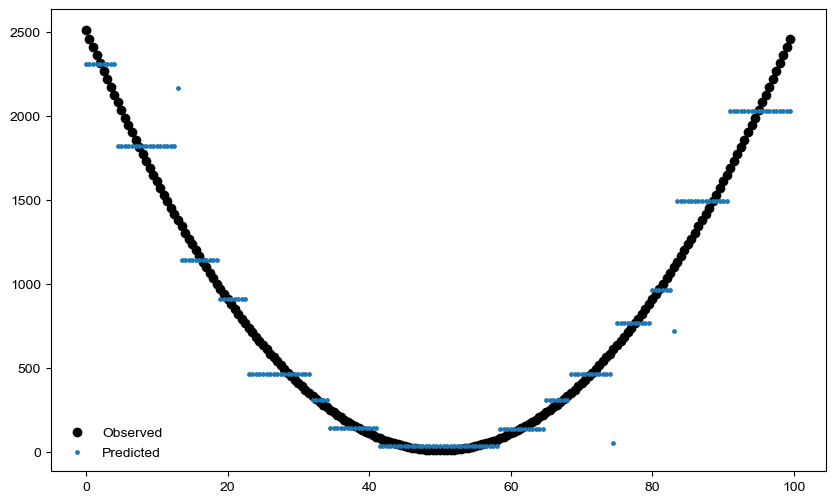

<Figure size 640x480 with 0 Axes>

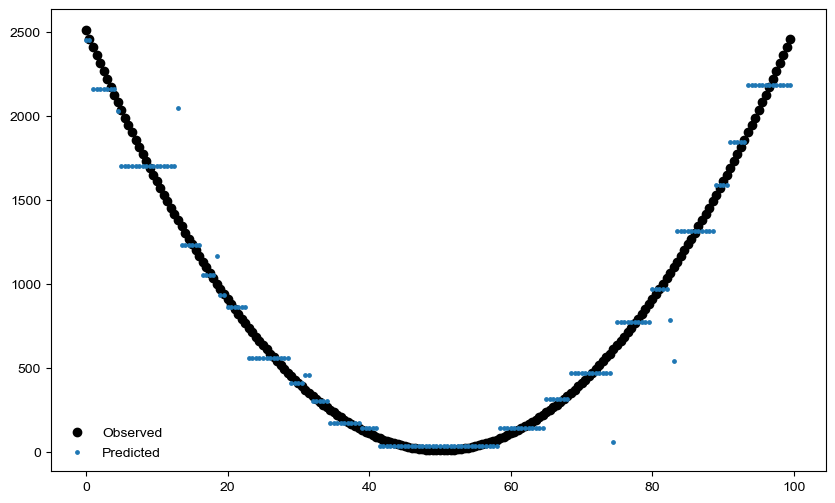

<Figure size 640x480 with 0 Axes>

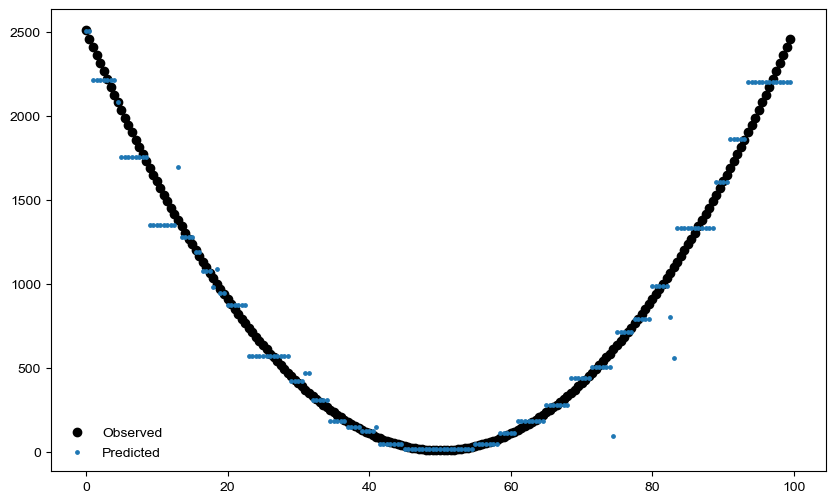

<Figure size 640x480 with 0 Axes>

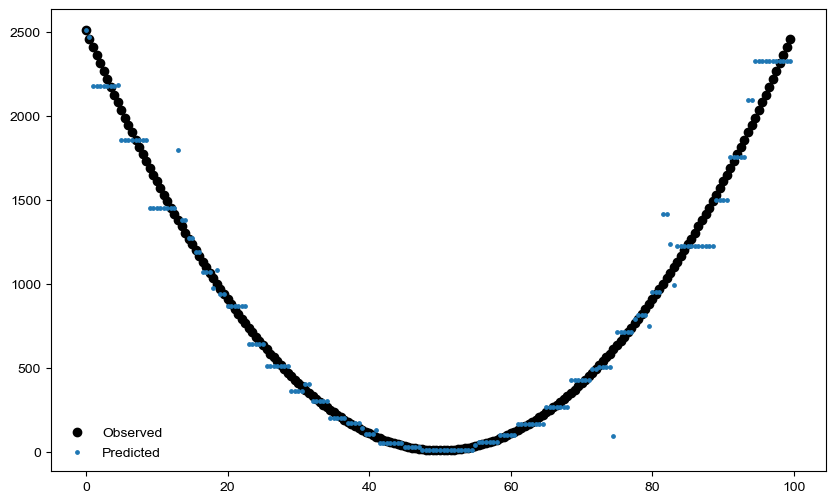

<Figure size 640x480 with 0 Axes>

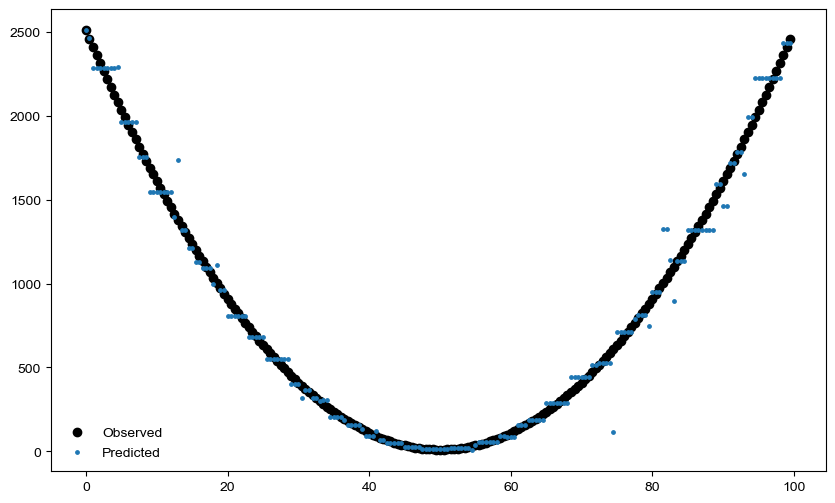

<Figure size 640x480 with 0 Axes>

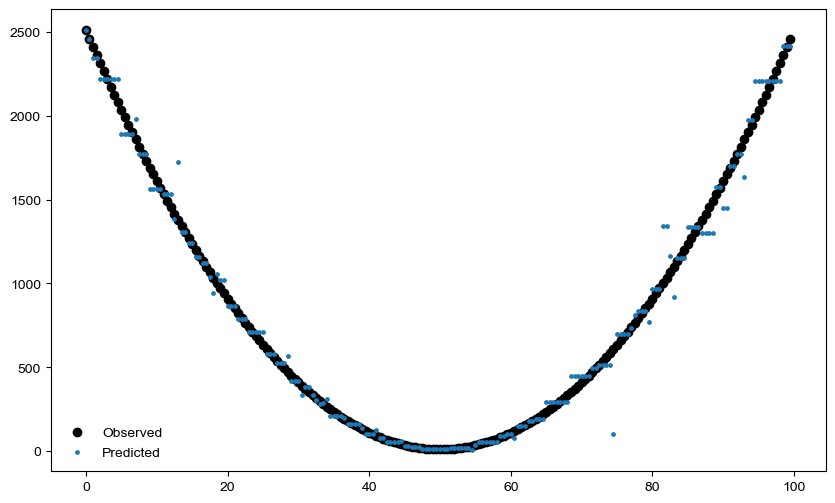

<Figure size 640x480 with 0 Axes>

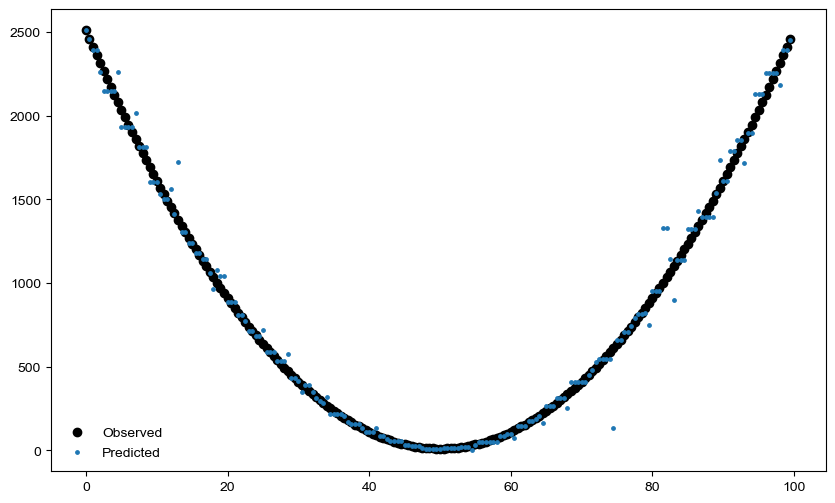

<Figure size 640x480 with 0 Axes>

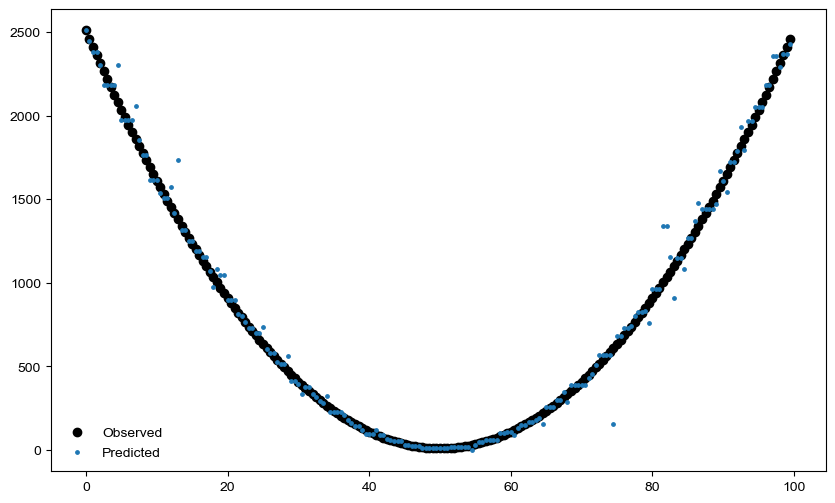

<Figure size 640x480 with 0 Axes>

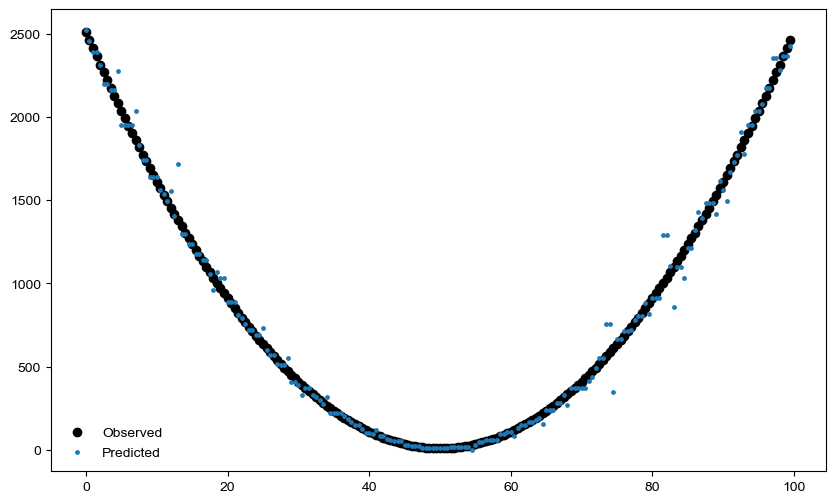

<Figure size 640x480 with 0 Axes>

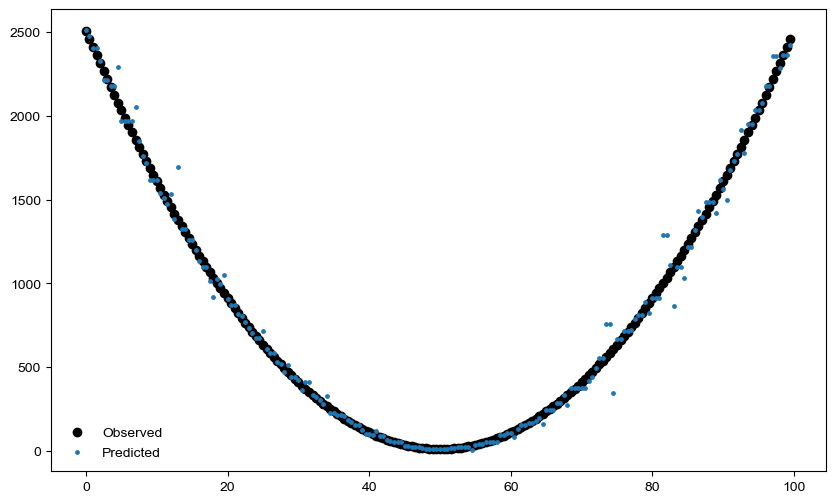

<Figure size 640x480 with 0 Axes>

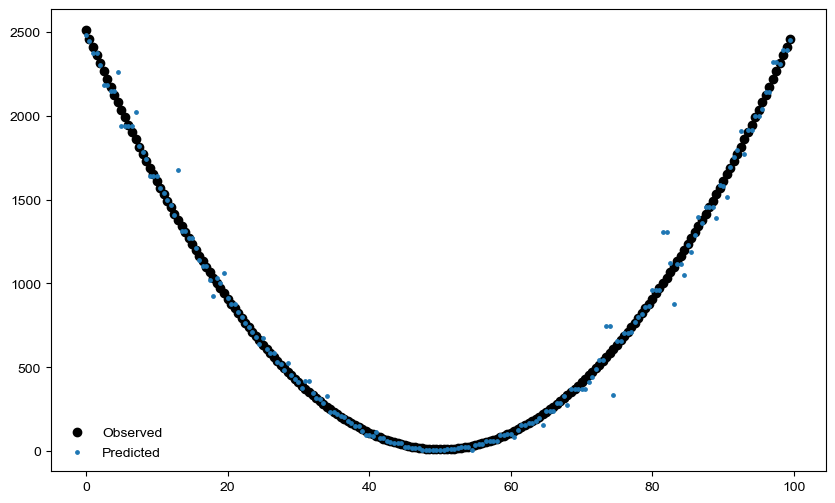

<Figure size 640x480 with 0 Axes>

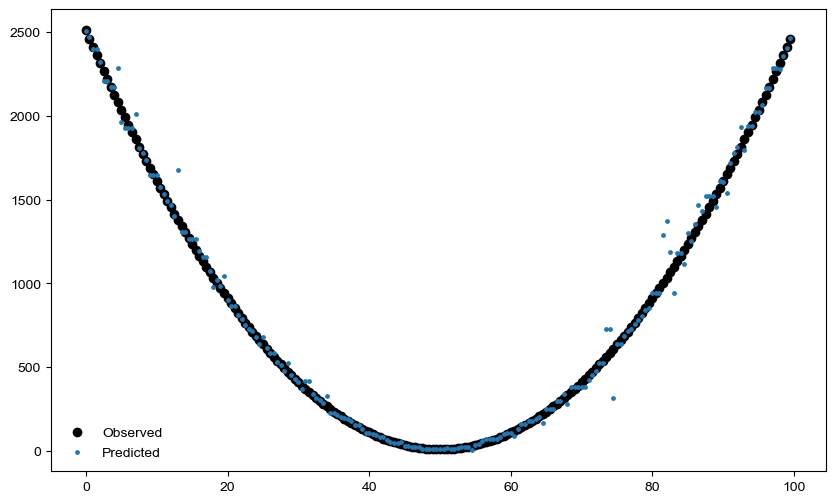

<Figure size 640x480 with 0 Axes>

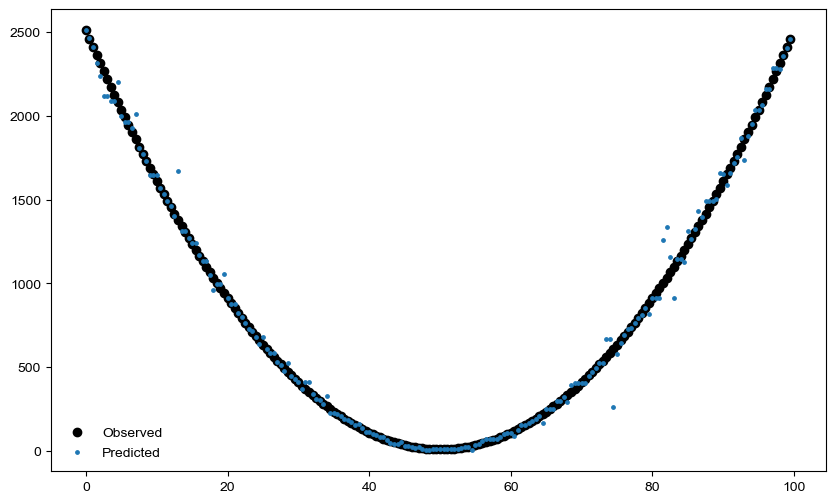

<Figure size 640x480 with 0 Axes>

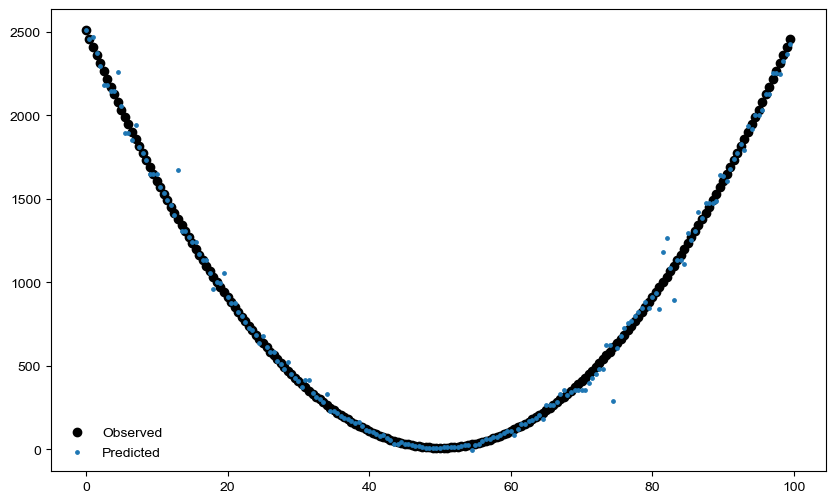

<Figure size 640x480 with 0 Axes>

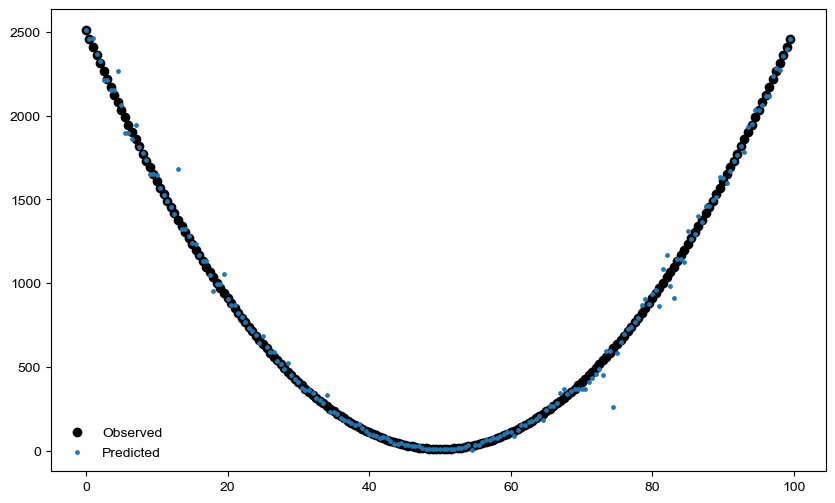

<Figure size 640x480 with 0 Axes>

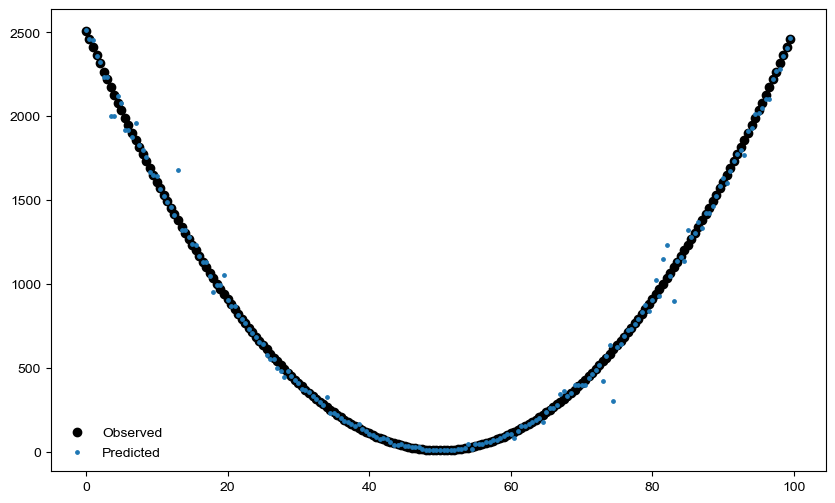

<Figure size 640x480 with 0 Axes>

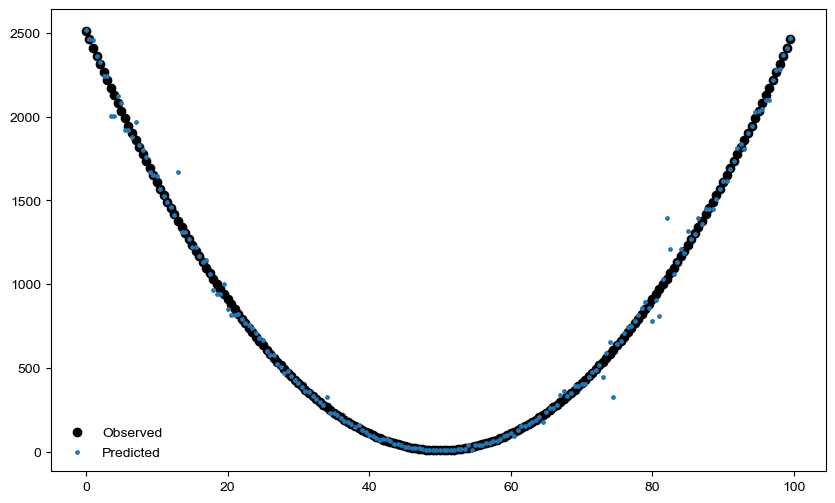

<Figure size 640x480 with 0 Axes>

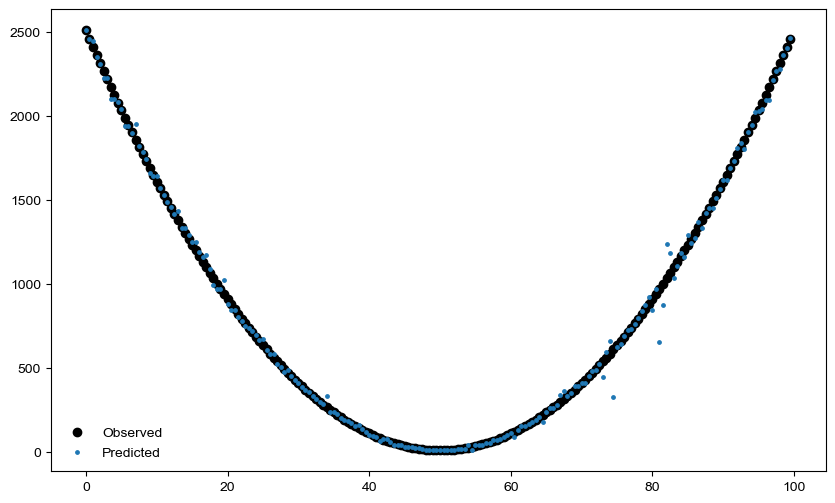

<Figure size 640x480 with 0 Axes>

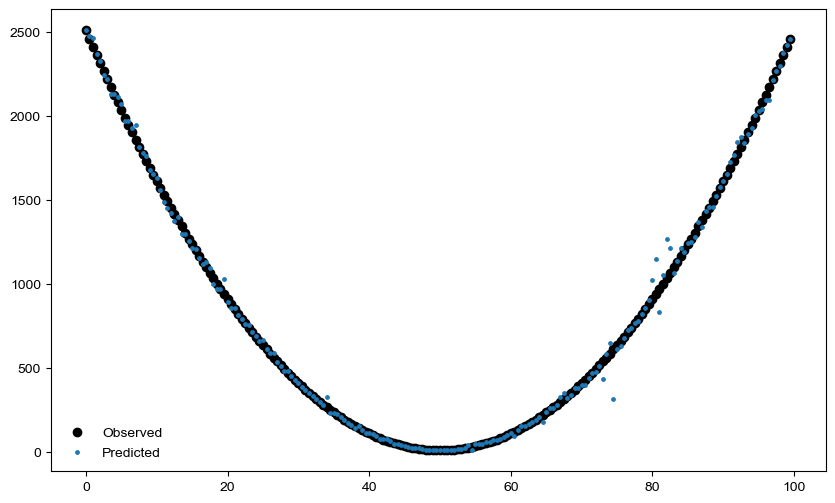

<Figure size 640x480 with 0 Axes>

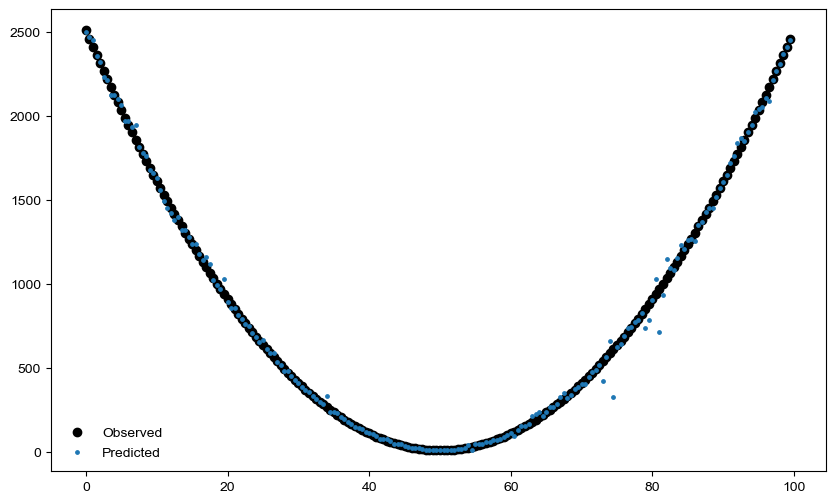

<Figure size 640x480 with 0 Axes>

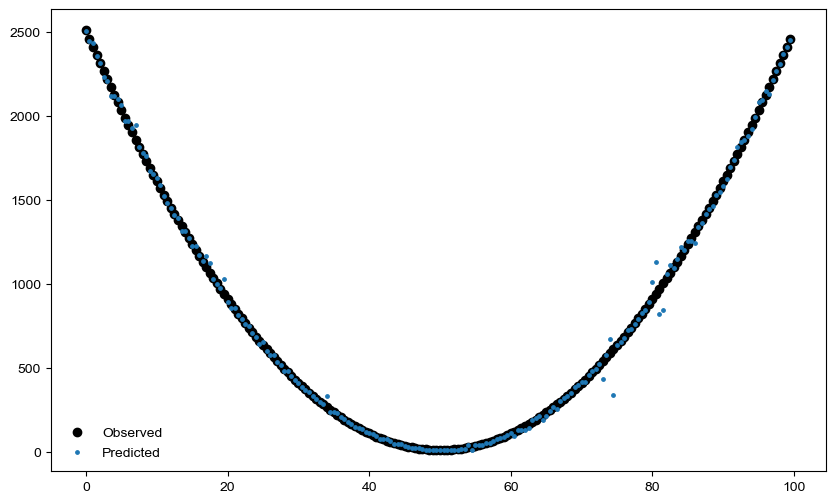

<Figure size 640x480 with 0 Axes>

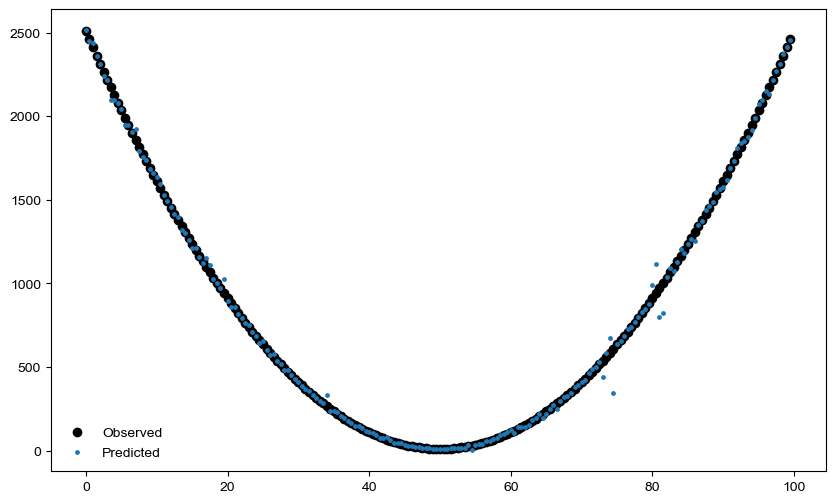

<Figure size 640x480 with 0 Axes>

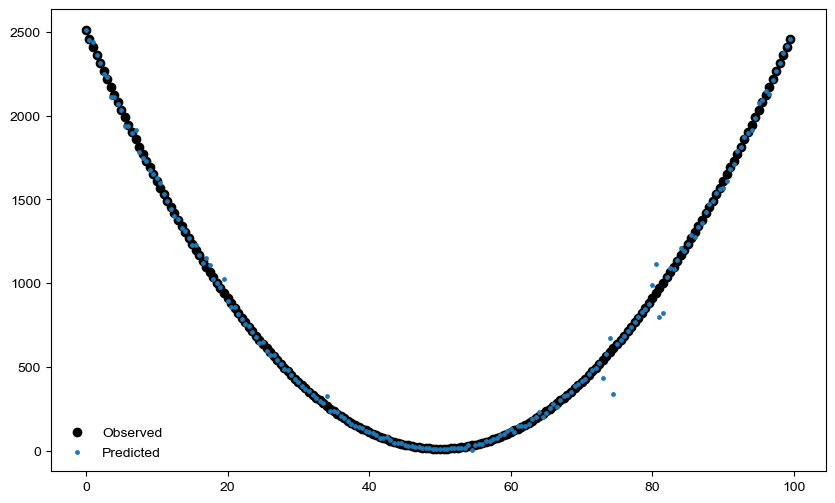

<Figure size 640x480 with 0 Axes>

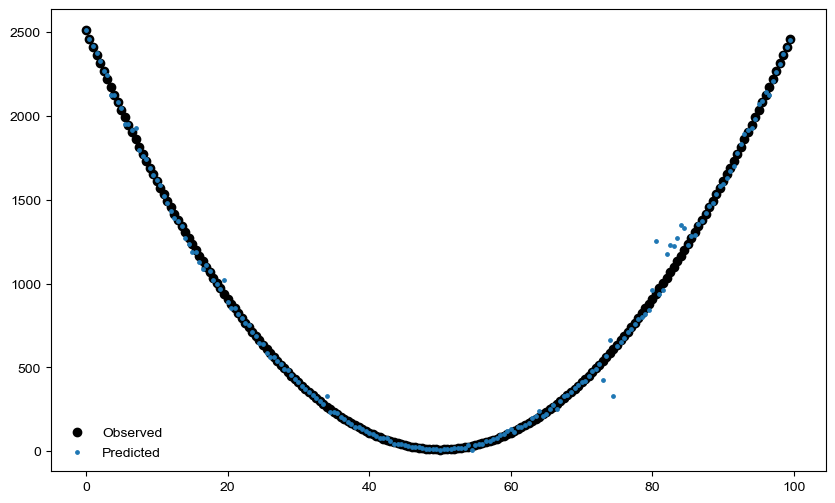

<Figure size 640x480 with 0 Axes>

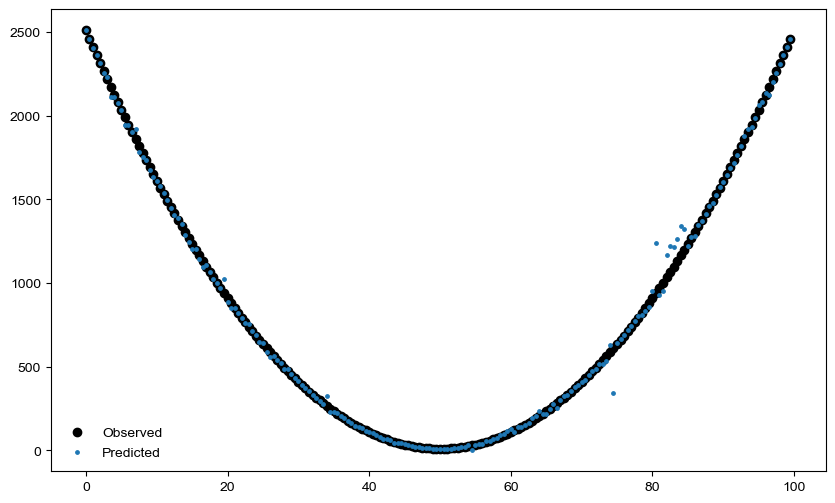

<Figure size 640x480 with 0 Axes>

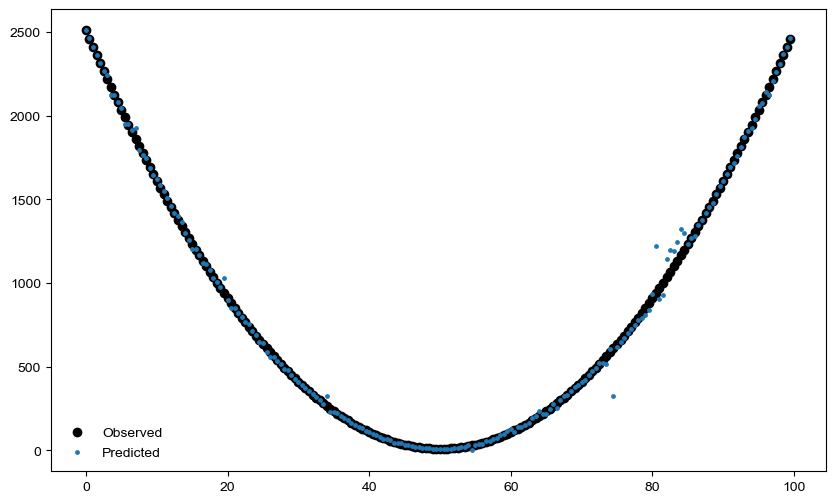

<Figure size 640x480 with 0 Axes>

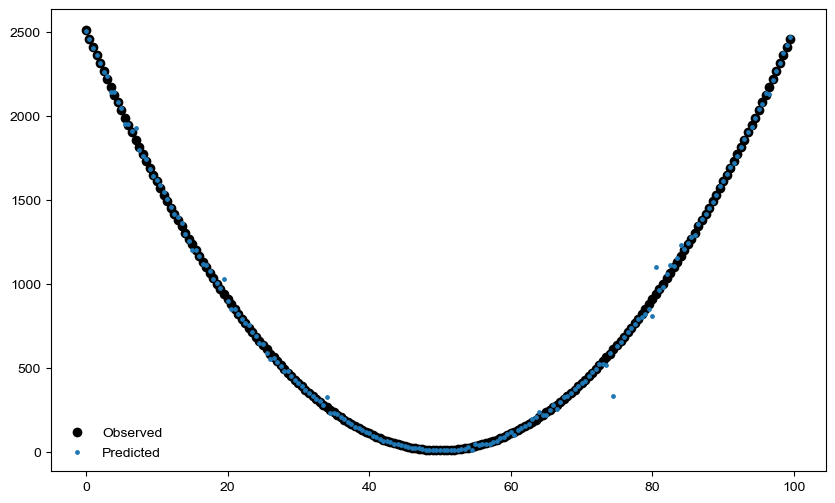

<Figure size 640x480 with 0 Axes>

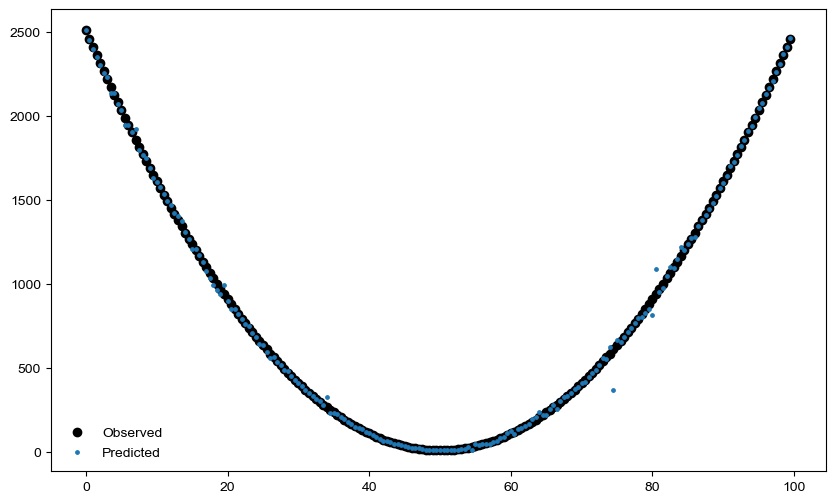

<Figure size 640x480 with 0 Axes>

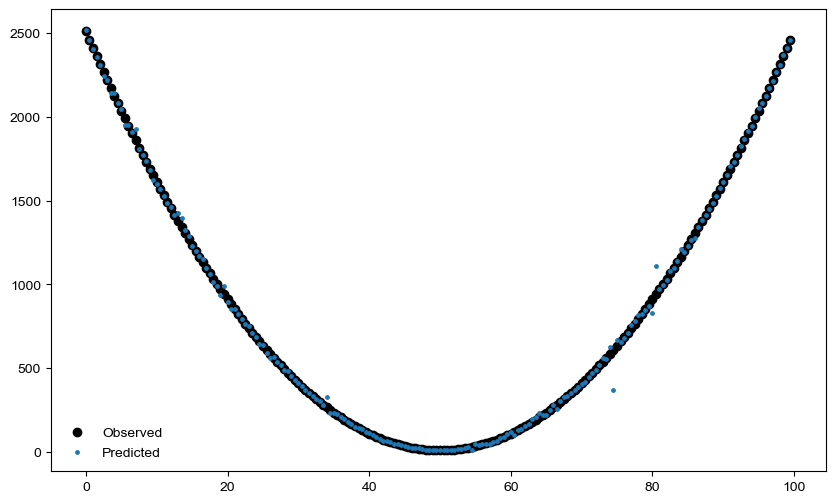

<Figure size 640x480 with 0 Axes>

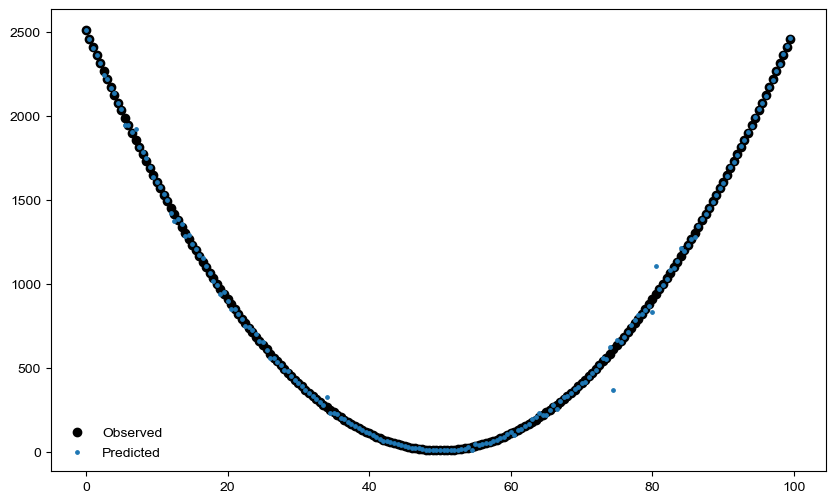

<Figure size 640x480 with 0 Axes>

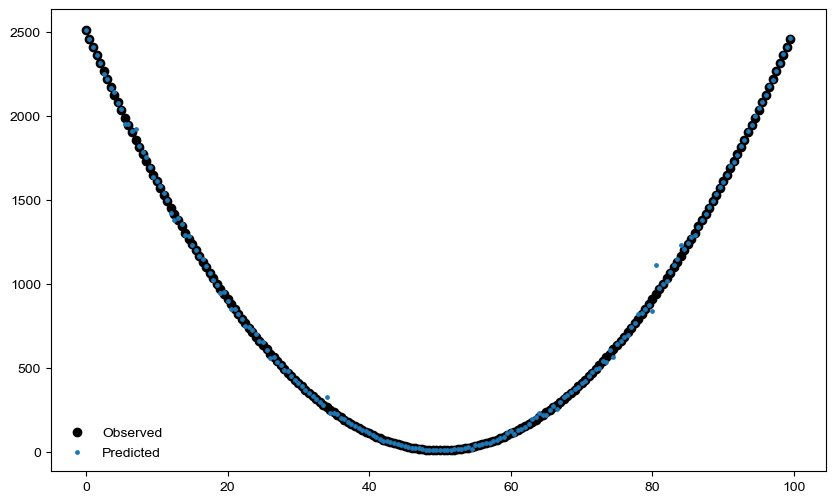

<Figure size 640x480 with 0 Axes>

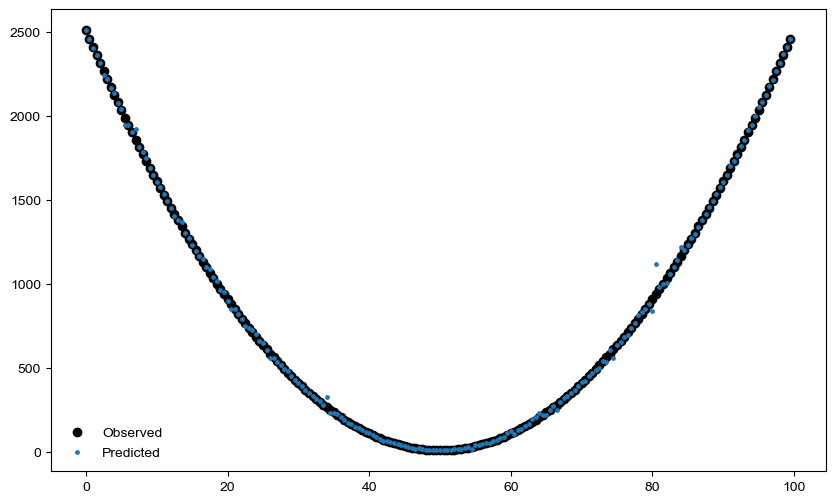

<Figure size 640x480 with 0 Axes>

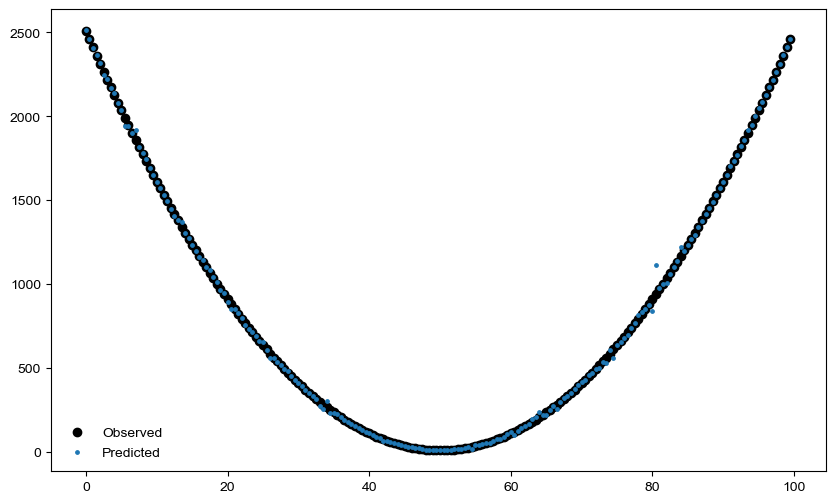

<Figure size 640x480 with 0 Axes>

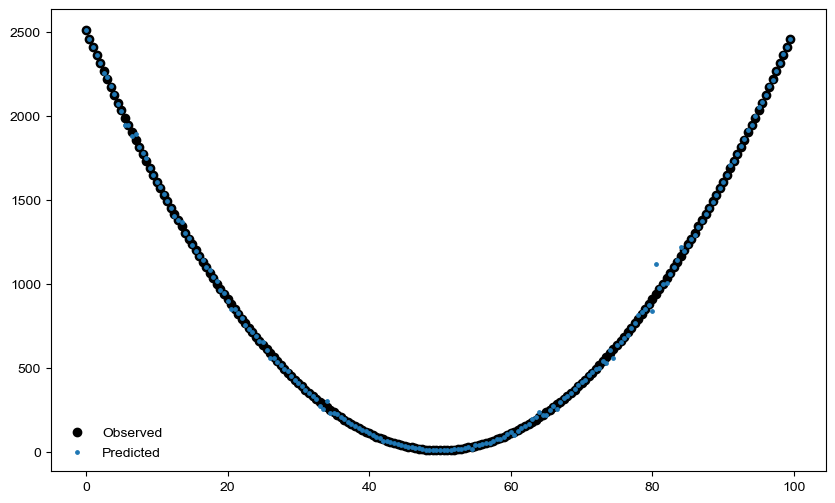

<Figure size 640x480 with 0 Axes>

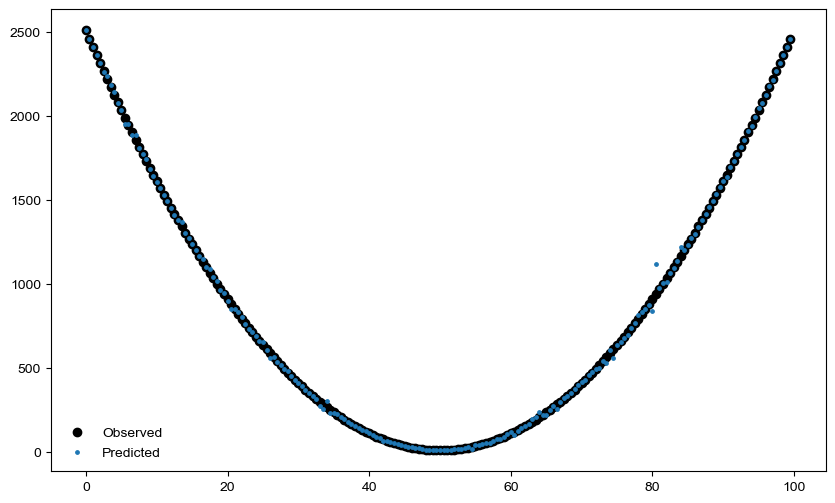

<Figure size 640x480 with 0 Axes>

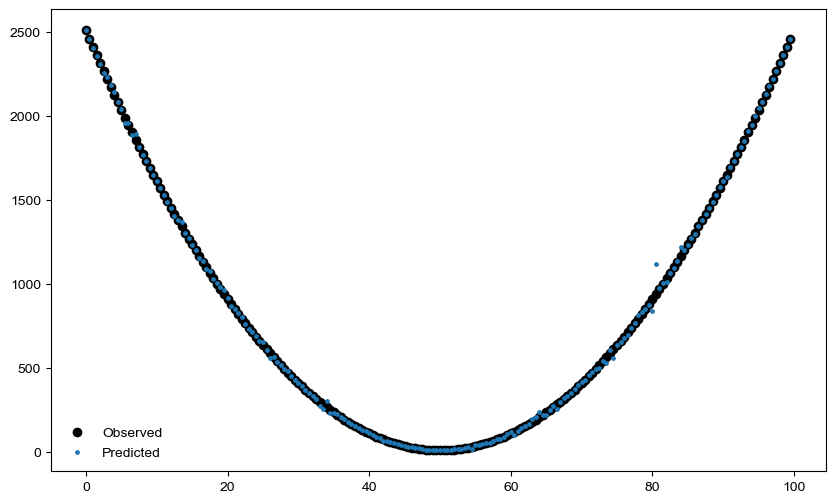

<Figure size 640x480 with 0 Axes>

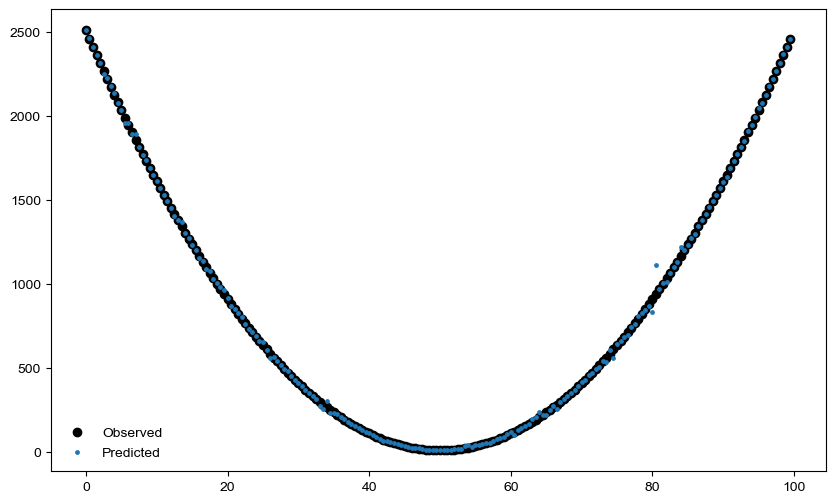

<Figure size 640x480 with 0 Axes>

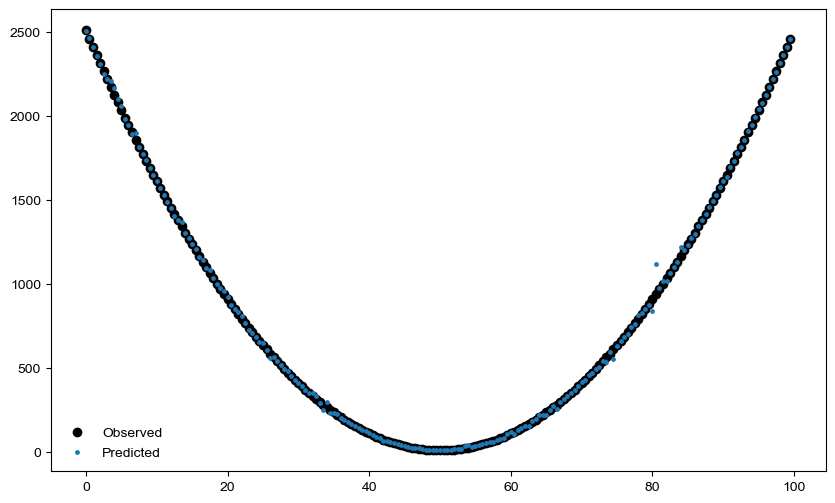

<Figure size 640x480 with 0 Axes>

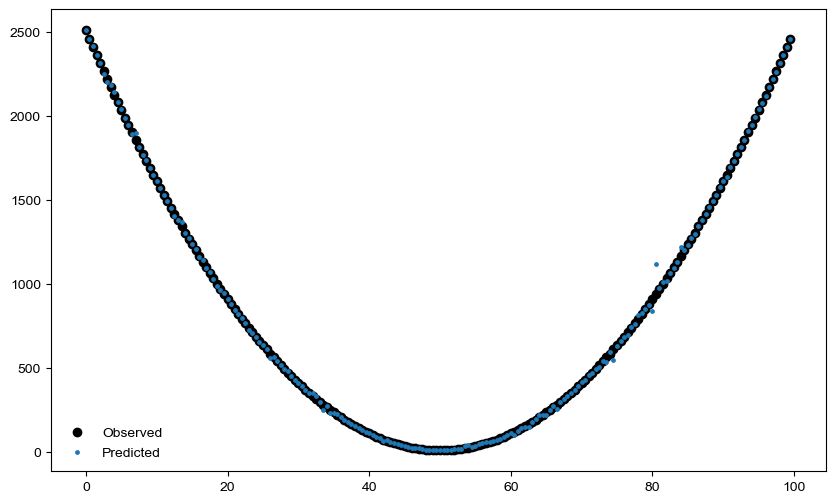

<Figure size 640x480 with 0 Axes>

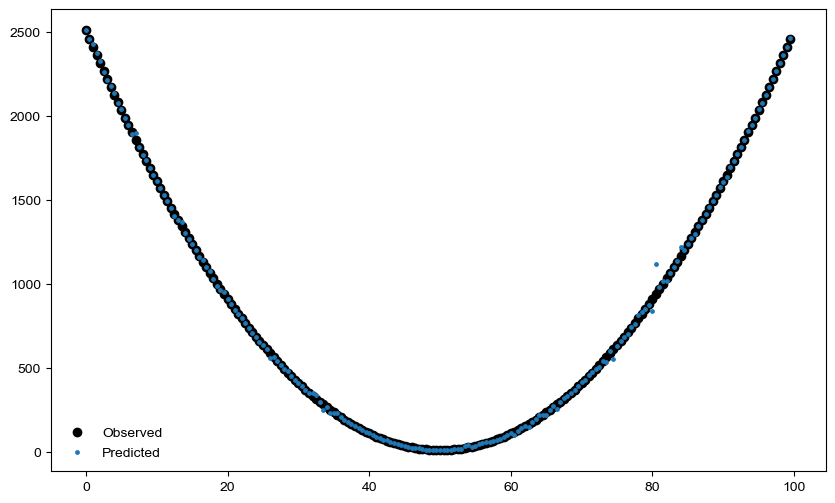

<Figure size 640x480 with 0 Axes>

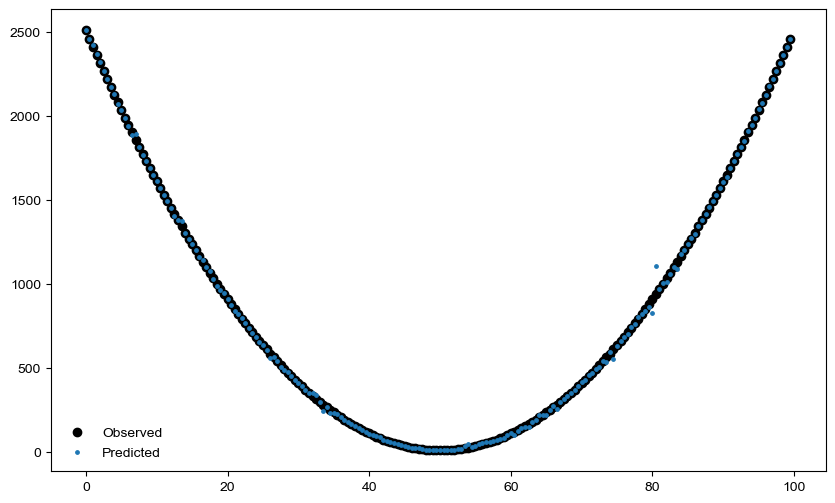

<Figure size 640x480 with 0 Axes>

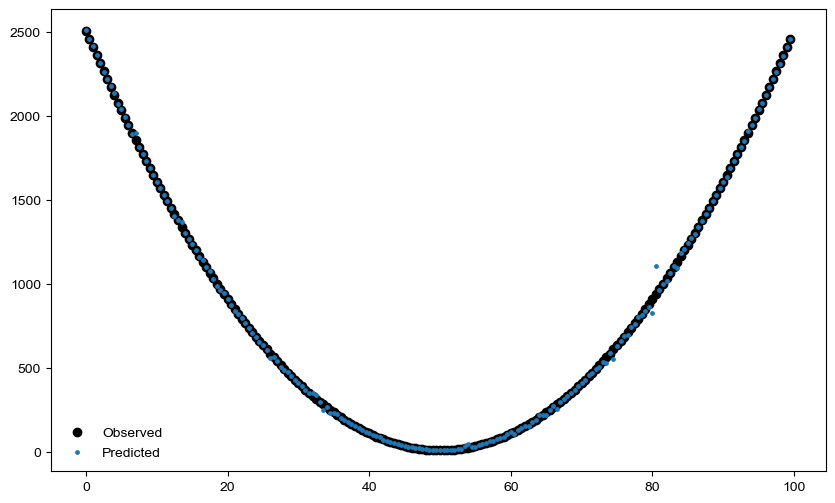

<Figure size 640x480 with 0 Axes>

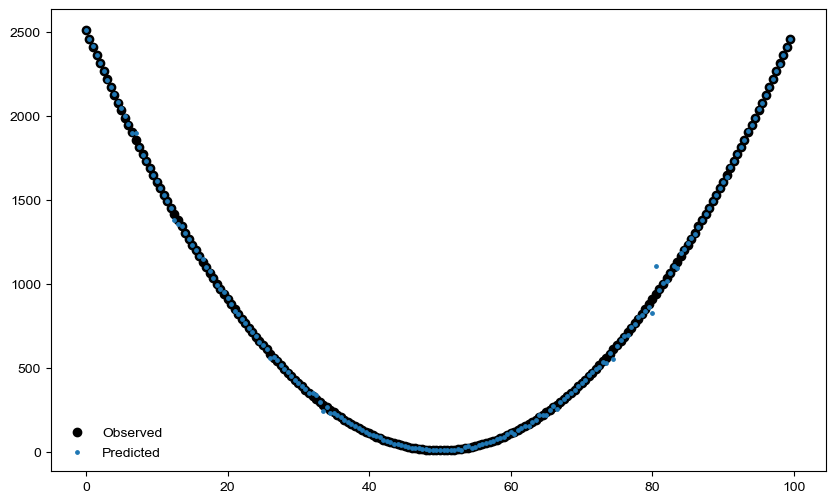

<Figure size 640x480 with 0 Axes>

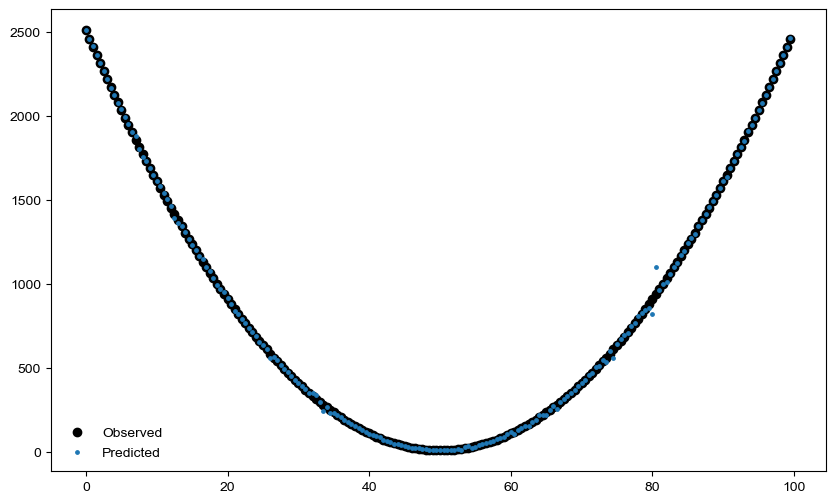

<Figure size 640x480 with 0 Axes>

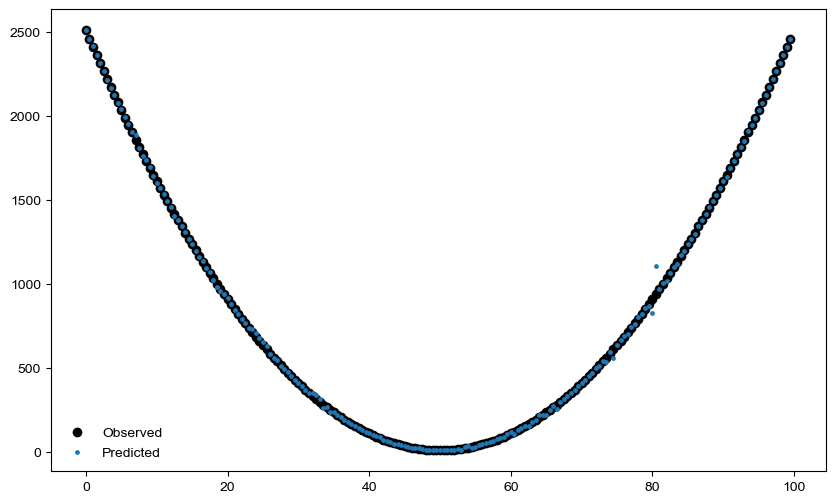

<Figure size 640x480 with 0 Axes>

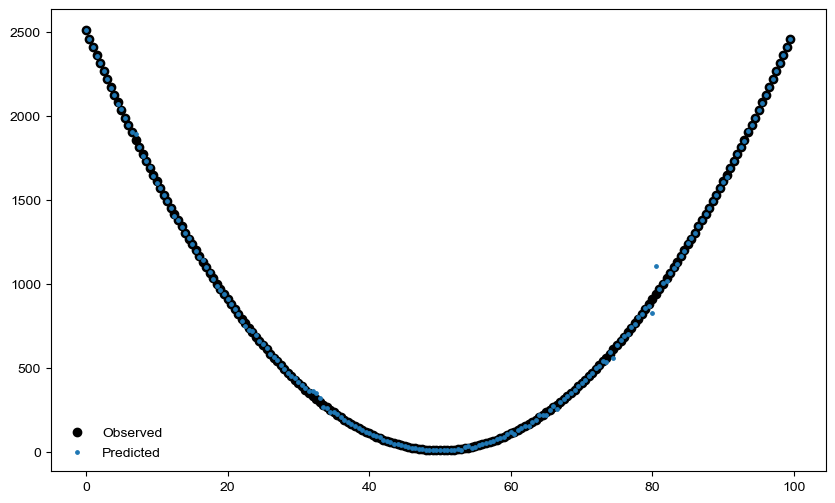

<Figure size 640x480 with 0 Axes>

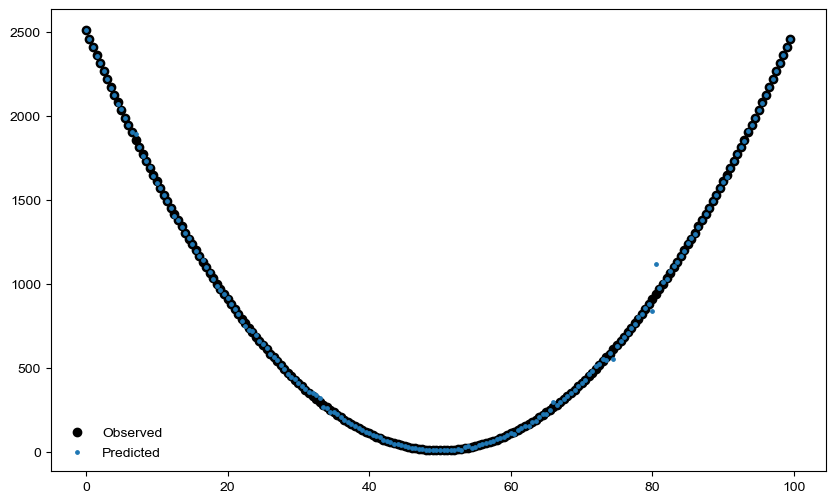

<Figure size 640x480 with 0 Axes>

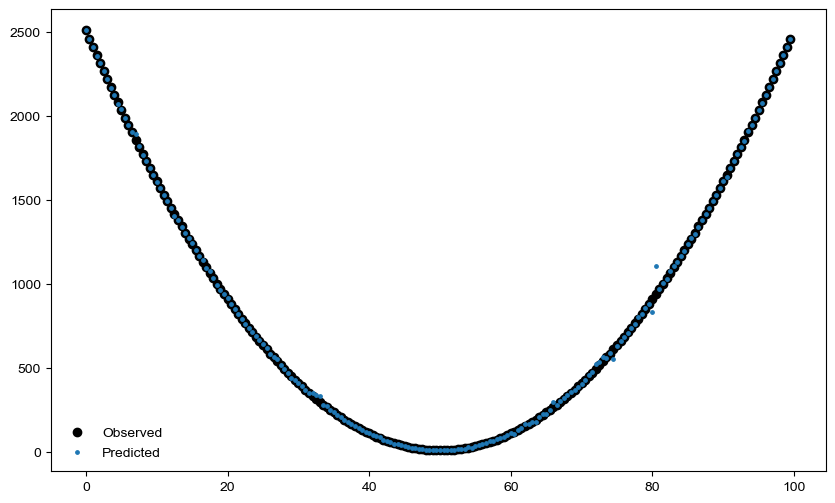

<Figure size 640x480 with 0 Axes>

In [8]:
#os.makedirs(os.path.join('xgb_fit_frames'), exist_ok=True)

# Get the predictions for different estimators


for i in range(1, xgb_model.n_estimators + 1):
    y_pred_stage = xgb_model.predict(xtrain, iteration_range=(0, i))

    plt.figure(figsize=(10, 6))
    plt.rcParams['font.family'] = 'Arial'
    plt.scatter(xtrain, ytrain, color='black')
    plt.scatter(xtrain, y_pred_stage, label=f"Boost {i}", s=6)
    plt.legend(['Observed', 'Predicted'], frameon = False)
    plt.show()

    # Save frame
    frame_path = f"frame_{i:03d}.png"
    plt.tight_layout()
    plt.savefig(frame_path)
    plt.show()
    plt.close()